In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [21]:
df = pd.read_csv("/content/cs-training.csv")
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [22]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.isna().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [23]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

<ipython-input-23-3511d642ee90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
<ipython-input-23-3511d642ee90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

{'whiskers': [<matplotlib.lines.Line2D at 0x7af3befe5110>,
 'caps': [<matplotlib.lines.Line2D at 0x7af3bf53b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af3bf538750>,
 'medians': [<matplotlib.lines.Line2D at 0x7af3bf5e5fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7af3bf5e71d0>,
 'means': []}

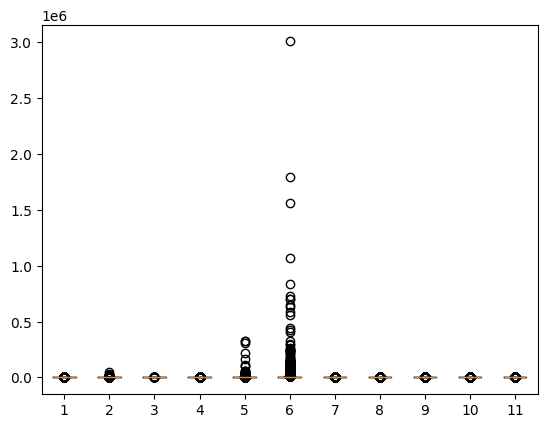

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(df)

In [25]:
cols_to_check = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']
z_scores = np.abs(stats.zscore(df[cols_to_check]))
df = df[(z_scores < 3).all(axis=1)]

In [26]:
X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [30]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     27793
           1       0.18      0.68      0.28      1958

    accuracy                           0.77     29751
   macro avg       0.57      0.73      0.57     29751
weighted avg       0.92      0.77      0.83     29751

Confusion Matrix:
 [[21670  6123]
 [  635  1323]]


In [32]:
print("\n--- Enter User Info ---")
age_= float(input("Age: "))
debt_ratio = float(input("Debt Ratio: "))
monthly_income = float(input("Monthly Income: "))
num_dependents = float(input("Number of Dependents family members: "))

user_input = {
    'RevolvingUtilizationOfUnsecuredLines': 0.5,
    'age': age_,
    'NumberOfTime30-59DaysPastDueNotWorse': 0,
    'DebtRatio': debt_ratio,
    'MonthlyIncome': monthly_income,
    'NumberOfOpenCreditLinesAndLoans': 5,
    'NumberOfTimes90DaysLate': 0,
    'NumberRealEstateLoansOrLines': 1,
    'NumberOfTime60-89DaysPastDueNotWorse': 0,
    'NumberOfDependents': num_dependents
}

user_df = pd.DataFrame([user_input])

user_scaled = scaler.transform(user_df)

# Predict
prediction = model.predict(user_scaled)
result = "Person can Default" if prediction[0] == 1 else "Person will not Default"
print("\nPrediction for user input:", result)


--- Enter User Info ---
Age: 40
Debt Ratio: 0.6
Monthly Income: 50000
Number of Dependents family members: 4

Prediction for user input: Person will not Default
